# Week 16

### 1.	Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

In [1]:
import pandas as pd
import numpy as np

diabetes_df = pd.read_csv("Classwork/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
X = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

### Logistic Regression using SMOTEEN

In [4]:
sm = SMOTEENN(random_state=42)

X_res, y_res = sm.fit_resample(X_train_scaler, y_train)

In [5]:
#train using the resampled data

model = LogisticRegression(random_state=42)
model.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [6]:
#calculate the accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaler)
balanced_accuracy_score(y_test, y_pred)
# old resampling comment below
#increased accuracy from .6 to .74 by using oversampling

0.7088888888888889

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [8]:
print(confusion_matrix(y_test, y_pred))

[[64 36]
 [12 42]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       100
           1       0.54      0.78      0.64        54

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.74      0.69      0.70       154



**SMOTEEN** Combined over and under sampling

SMOTEEN uses SMOTE and ENN to create more samples in the majority and minority classes.  SMOTE create new minority data points using original minority data points to better represent the minority class. It doesn't repeat the same minoirty data points as naive oversampling.

ENN (Edited Nearest Neighbors).  From what I've read, it seems to locate misclassified data points and removed them using nearest neighbors.  By default, ENN removes data from both minority and majority classes.   So if the observation is in disagreement over the k(default=3) nearest neighbors majority class, then all are deleted.

I ran the default method above.  It's possible that tuning the SMOTEEN would product better results in the logistic regression.

### Decision Tree Regression using SMOTEEN

In [10]:
from sklearn import tree

In [11]:
tree_model = tree.DecisionTreeClassifier(max_depth=6, random_state=42)

In [12]:
tree_model = tree_model.fit(X_res, y_res)
y_tree_pred = tree_model.predict(X_test_scaler)

In [13]:
confusion_matrix(y_test, y_tree_pred)

array([[64, 36],
       [10, 44]])

In [14]:
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74       100
           1       0.55      0.81      0.66        54

    accuracy                           0.70       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.75      0.70      0.71       154



In [15]:
balanced_accuracy_score(y_test, y_tree_pred)

0.7274074074074074

### Decision Tree Regression using SMOTEEN, taking out BloodPressure and SkinThickness

In [16]:
tree_model_2 = tree.DecisionTreeClassifier(max_depth=8, random_state=42)

X = diabetes_df.drop(['Outcome', 'BloodPressure', 'SkinThickness'], axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [17]:
sm = SMOTEENN(random_state=42)

X_res, y_res = sm.fit_resample(X_train_scaler, y_train)

In [18]:
tree_model_2.fit(X_res, y_res)
y_tree_pred2 = tree_model_2.predict(X_test_scaler)

In [19]:
confusion_matrix(y_test, y_tree_pred2)

array([[73, 27],
       [15, 39]])

In [20]:
print(classification_report(y_test, y_tree_pred2))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



In [21]:
balanced_accuracy_score(y_test, y_tree_pred2)

0.7261111111111112

### 2.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

The performance improved for False Negative class, but I'm not sure there are huge gains.

In tyring to directly compare models, I've chosed balanced accuracy score.  However, I think there are many other ways to think about performance.   We can look at the precision for all models, computational time, and perhaps, more importantly, the false negative rate.

With recall = TP/(TP + FN), as False Negatives are smaller, the recall rate moves closer to 1.

So another way to score the diabetes models would be to look at the recall of class 1.  In the SMOTE and SMOTEEN resampling, the recall of class 1 improved.  This number was in the mid-50s and moved to 70s and above.

Other sampling techiniques (lecture notebook) seem to help improve the recall of class 1.  However those used imbalanced classification report and I don't know if there is a direct comparison.

Using balanced_accuracy_score (average of recall obtained on each class):

73% accuracy score from SMOTE using LogisticRegression (Source: Week_15_inclass)

71% accuracy score from SMOTEEN using LogisticRegression.  (Source: this notebook)

73% accuracy score from SMOTEEN using DecisionTreeRegression (Source: this notebook)

77% accuracy score using DecisionTreeRegression when BloodPressue and SkinThickness were taken out. (Source: Week_16_Group_inClass)

71% accuracy score from LogisticRegression (Source: Week_14_homework)

73% accuracy score from LogisticRegression when BloodPressue and SkinThickness were taken out (Source: Week_14_homework)

68% accuracy score from KNN (Source: Week_14_homework) This is different than the model score of 72%

74% accuracy score from RandomOverSampler and Logistic Regression. (Source: over_under_sampling.ipynb class notebook)

After looking at all these accuracy numbers, I tried to improve the performance of the SMOTEEN using DecisionTreeRegression by taking out BloodPressure and SkinThickness.   I ran few different max_depth trees, but did not get a radical performance improvement.

### 3.	What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outlier detection looks for data points that can lie far out of the distribution of the data points.  For example, data that lies 2-3 standard deviations from the mean for a normal distribution would be considered outliers.

Outliers could be noise, data errors, experimental errors, naturally occurring, or even experiements themselves (how does the model handle the outier).  In some cases, the model itself is trying to detect outliers.   Even in the diabetes data set, diabetes itself is an outlier, so a diabetes detection model is trying to predict the outliers.

Methods:
* Using standard deviation
* A mulitiplier (like 1.5) outside the interquartile ranges
* DBScan Clustering or other clustering algorithms
* Isolation Forest
* Robust Random Cut Forest
* Z-Score (based on std dev)
* Linear Regression Models (Principal Component Analysis)

### 4.	Perform a linear SVM to predict credit approval (last column) using this dataset: 
https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 
You can use this code, but otherwise you follow standard practices we have already used many times: 


In [22]:
credit_df = pd.read_table("australian.dat", sep=" ",header=None)
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [23]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    float64
 7   7       690 non-null    int64  
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
 14  14      690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [24]:
credit_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


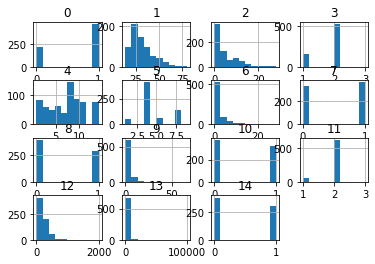

In [25]:
# looking at the distributions of the column data
credit_df.hist();

In [26]:
# testing calling column - first time we've worked in an int named column instead of a string
credit_df[14]

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: 14, Length: 690, dtype: int64

In [27]:
# from problem set
from sklearn.svm import SVC
lsvc_model = SVC(kernel='linear')

In [28]:
# split data into train and test, 25% test data
# stratify on y, because outcome class is not quite 50/50
X = credit_df.drop(14, axis = 1)
y = credit_df[14]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [29]:
#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [30]:
lsvc_model.fit(X_train_scaler, y_train)

lsvc_y_pred = lsvc_model.predict(X_test_scaler)

In [31]:
confusion_matrix(y_test, lsvc_y_pred)

array([[69, 27],
       [ 6, 71]])

In [32]:
print(classification_report(y_test, lsvc_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        96
           1       0.72      0.92      0.81        77

    accuracy                           0.81       173
   macro avg       0.82      0.82      0.81       173
weighted avg       0.83      0.81      0.81       173



In [33]:
# I also tried running the SVC on non-scaled data.   Probably NOT the right thing to do.
# Further reading says SVC-linear works best on scaled data.
# This unscaled data model also seems to take longer to run
new_model = SVC(kernel='linear')
new_model.fit(X_train, y_train)
lsvc_y_pred_unscaled = new_model.predict(X_test)

confusion_matrix(y_test, lsvc_y_pred_unscaled)

array([[72, 24],
       [ 8, 69]])

In [34]:
# unscaled data
print(classification_report(y_test, lsvc_y_pred_unscaled))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        96
           1       0.74      0.90      0.81        77

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.81       173
weighted avg       0.83      0.82      0.82       173



### 5.	How did the SVM model perform? Use a classification report. 

In [35]:
# this model used the scaled data
print(classification_report(y_test, lsvc_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        96
           1       0.72      0.92      0.81        77

    accuracy                           0.81       173
   macro avg       0.82      0.82      0.81       173
weighted avg       0.83      0.81      0.81       173



**The SVM model preformed well.**

The precision for class 1 is 72% - not great accuracy, but not bad.
The recall for 1 is 90%, so the model predicted 90% of class 1.

The precision for class 0 is 92% - high accuracy for this class.
The recall for 0 is 72%, so the model predicited 72% of class 0.

Depending on what class 1 and 0 are, this model could be ideal if the answer has to do with credit worthiness.  However if the false positive number (27 from the confusion matrix) was those that model deemed credit worthy (for example), but were not, that's really concerning.  Unlike the diabetes data set, the business would rather have a low false positive rate than a low false negative rate if what we're talking about is credit worthiness. It would be easier to review by human false negative data then auto approve the false positives (seemed credit worthy, but were not).  


***IF THE MODEL INDICATES CREDIT APPROVAL WITH CLASS 1:***

Then the model should only be used to automatically deny credit approval, but not *approve* credit.  Clearly, it seems risky that the precision for Class 1 is so low.

### 6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 

I am most interested in **applying data to solve business or industry problems or using data to provide insight**.  Being part of team with individual and group work sounds most appealing with opportunities to grow my technical skills.  Most jobs seem to be titled as a data analyst or associate data scientist.

One job that sounds that I would meet the qualifications for is a **Data Reporting Specialist** with Anheuser-Busch.   The job description part that interests me the most are **sales modeling** for near- and long-term projections, **programming ability, willingness to learn new skills, team-orientation**, and **ability to draw insightful conclusions and communicate them**.

Another job description I liked was a **python and SQL developer** where the job requirement was to develop a new security tool that will help protect and match large sets of data.

A few of the jobs that are interesting to me also have requirements for MS or PhD in a technical field such as computer science or mathematics.  

The **Associate Data Scientist** with Spectrum Brands job description would be something I’m interested in.   The job **supports sales, marketing, supply chain and leadership teams** with insights derived from analyzing internal and external data. One responsibility is developing **custom data models and algorithms** to apply to data sets and predictive modeling.  **Communicating to non-technical audiences** is also required and something I like to do.

**I like to head up projects and using soft skills to build collaboration.**  At this time, I’m not interested in managing a team or group; I would rather be a contributing team member.  

Being a beginner at data analytics and data science, having no team support or mentor to learn from is probably my largest concern.  Also, the more I am learning through class, the more I know I don’t know and that motivates me to keep learning.
